<a href="https://colab.research.google.com/github/areegtarek/Huawei-HCIA-AI/blob/main/4-%20IRIS%20Decision%20Tree%20Hyperparameter%20Tuning%20Using%20Grid%20Search/IRIS_Decision_Tree_Hyperparameter_Tuning_Using_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS Decision Tree Hyperparameter Tuning Using Grid Search**

# **Classify iris plants into three species**

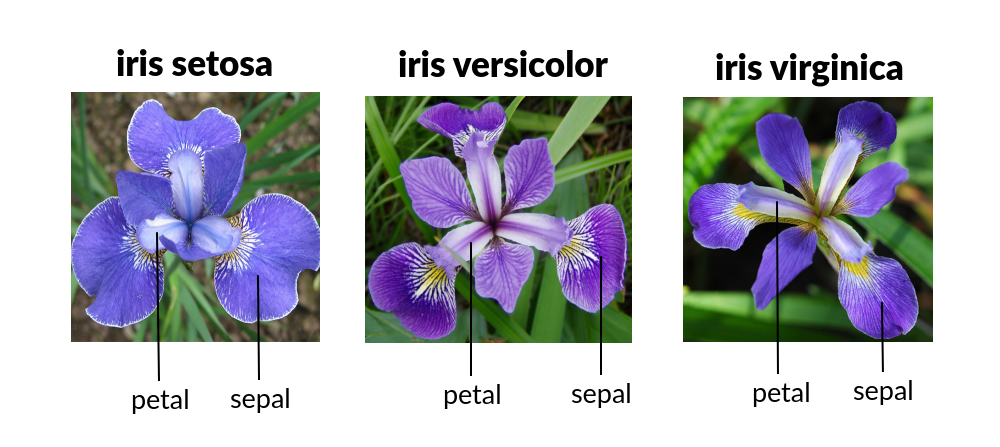

# **Data Describtion**

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Necessary Libraries and datasets**

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [3]:
# Load data 
dataset = pd.read_csv("/content/drive/MyDrive/Huawei AI/IRIS/Iris.csv")

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
dataset.duplicated().sum()

0

In [9]:
#Frequency distribution of classes"
outcome = pd.crosstab(index=dataset["Species"],  # Make a crosstab
                              columns="count")      # Name the count column
 
outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# **Correlational Analysis**


In [10]:
corr_all = dataset.corr()

Petal width and petal length have high correlations. 

Petal length and sepal width have good correlations.

Petal Width and Sepal length have good correlations.

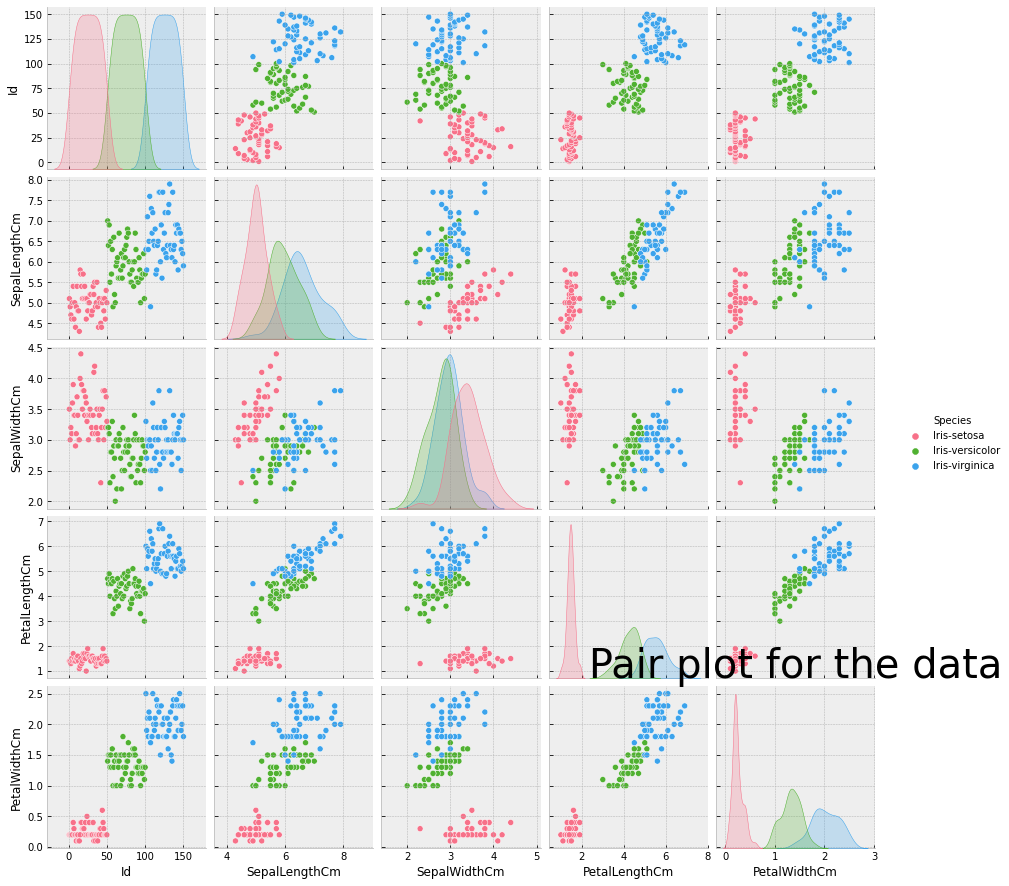

In [11]:
plt.rcParams['figure.figsize'] = (40, 41)
sns.pairplot(dataset, hue = 'Species', palette = 'husl')
plt.title('Pair plot for the data', fontsize = 40)
plt.show()

# **Numerical data distribution**

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


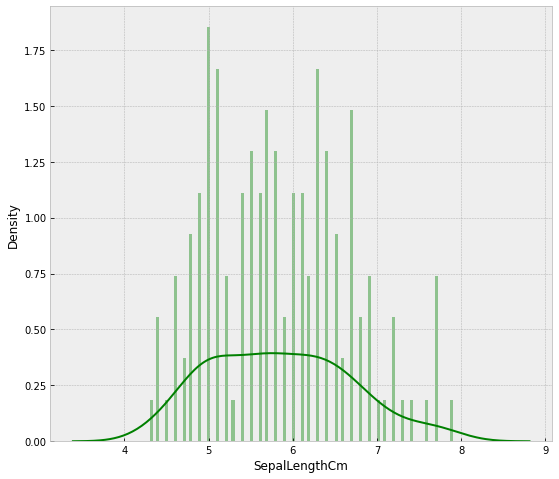

In [12]:
print(dataset['SepalLengthCm'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['SepalLengthCm'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


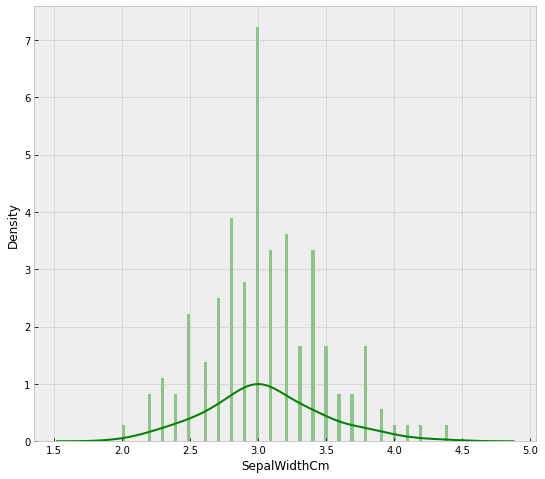

In [13]:
print(dataset['SepalWidthCm'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['SepalWidthCm'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


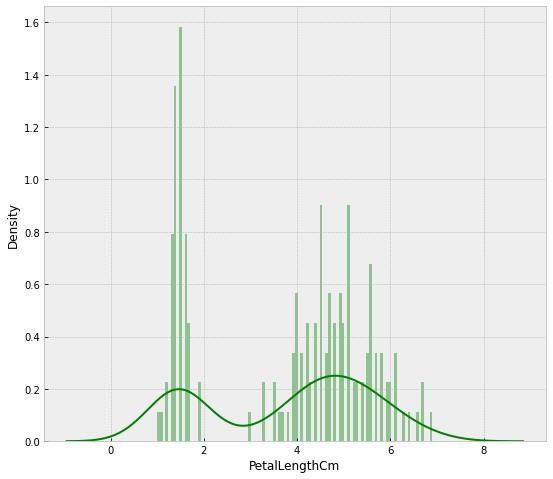

In [14]:
print(dataset['PetalLengthCm'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['PetalLengthCm'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


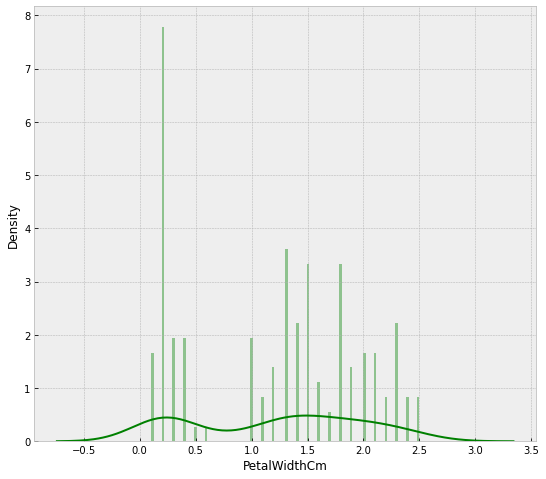

In [15]:
print(dataset['PetalWidthCm'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['PetalWidthCm'], color='g', bins=100, hist_kws={'alpha': 0.4});

# **Handling outliers**

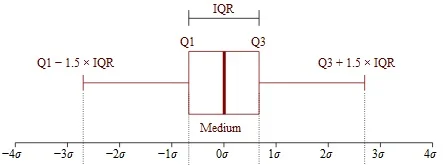

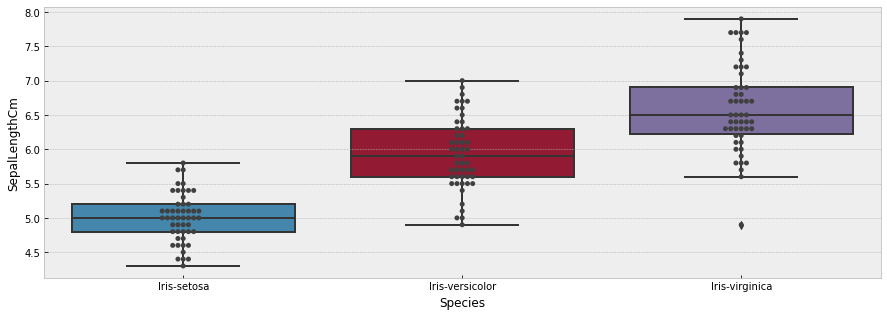

In [16]:
#boxplot
plt.rcParams['figure.figsize'] = (15, 5)
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=dataset)
ax = sns.swarmplot(x="Species", y="SepalLengthCm", data=dataset, color=".25")

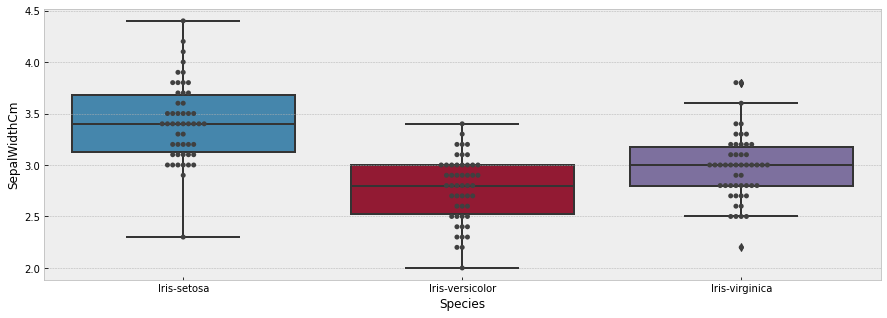

In [17]:
#boxplot
plt.rcParams['figure.figsize'] = (15, 5)
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=dataset)
ax = sns.swarmplot(x="Species", y="SepalWidthCm", data=dataset, color=".25")

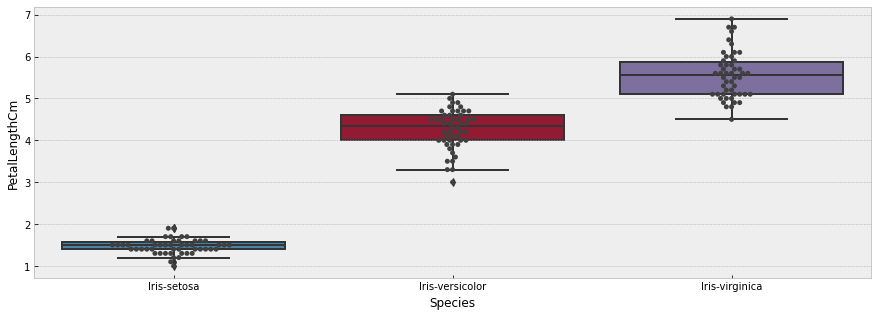

In [18]:
#boxplot
plt.rcParams['figure.figsize'] = (15, 5)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
ax = sns.swarmplot(x="Species", y="PetalLengthCm", data=dataset, color=".25")

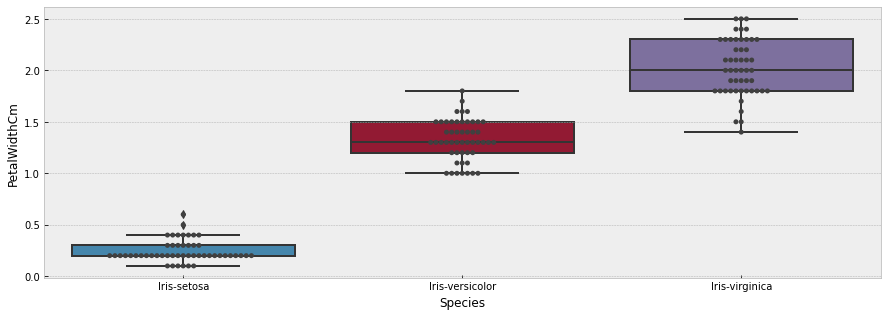

In [19]:
#boxplot
plt.rcParams['figure.figsize'] = (15, 5)
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=dataset)
ax = sns.swarmplot(x="Species", y="PetalWidthCm", data=dataset, color=".25")

Species Setosa has the smallest features and less distributed with some outliers.

Species Versicolor has the average features.

Species Virginica has the highest features

**SepalWidthCm The values above 4 and below 2 are acting as outliers.**

In [20]:
# remove outlier
dataset= dataset[dataset['SepalWidthCm'] < 4 ].reset_index(drop=True)

In [21]:
# remove outlier
dataset= dataset[dataset['SepalWidthCm'] > 2 ].reset_index(drop=True)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             145 non-null    int64  
 1   SepalLengthCm  145 non-null    float64
 2   SepalWidthCm   145 non-null    float64
 3   PetalLengthCm  145 non-null    float64
 4   PetalWidthCm   145 non-null    float64
 5   Species        145 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.9+ KB


In [23]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [24]:
#rescale the data to be robust to outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size =0.2, random_state = 42)

# **Train The Model**

In [60]:
# import the classifier
from sklearn.tree import DecisionTreeClassifier

# create a classifier object
classifier = DecisionTreeClassifier(max_depth=3,random_state = 42) 
  
# fit the regressor with data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# **Decision Tree Model Evaluation**

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [62]:
print(classification_report(y_test, classifier.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.75      1.00      0.86         9
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        29
      macro avg       0.92      0.91      0.90        29
   weighted avg       0.92      0.90      0.90        29



# **Hyperparameter Tuning Using Grid Search**

In [36]:
# Hyper parameters range intialization for tuning 

parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
tuning_model=GridSearchCV(classifier,param_grid=parameters, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")

In [39]:
%%time
tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 50400 candidates, totalling 151200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fracti

CPU times: user 1min 52s, sys: 1.08 s, total: 1min 53s
Wall time: 3min 56s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.66374269 0.65519568 0.66374269 ...        nan        nan        nan]
  category=UserWarning,


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [40]:
score_df = pd.DataFrame(tuning_model.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_weight_fraction_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002055,0.000158,0.000712,0.000072,1,auto,None,1,0.1,best,"{'max_depth': 1, 'max_features': 'auto', 'max_...",0.666667,0.666667,0.657895,0.663743,0.004135,8401
1,0.001816,0.000024,0.000599,0.000021,1,auto,None,1,0.1,random,"{'max_depth': 1, 'max_features': 'auto', 'max_...",0.666667,0.641026,0.657895,0.655196,0.010640,9601
2,0.001809,0.000040,0.000611,0.000017,1,auto,None,1,0.2,best,"{'max_depth': 1, 'max_features': 'auto', 'max_...",0.666667,0.666667,0.657895,0.663743,0.004135,8401
3,0.001807,0.000032,0.000574,0.000013,1,auto,None,1,0.2,random,"{'max_depth': 1, 'max_features': 'auto', 'max_...",0.666667,0.641026,0.657895,0.655196,0.010640,9601
4,0.001867,0.000055,0.000647,0.000083,1,auto,None,1,0.3,best,"{'max_depth': 1, 'max_features': 'auto', 'max_...",0.666667,0.666667,0.657895,0.663743,0.004135,8401


In [41]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_weight_fraction_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7200,0.001552,0.000028,0.000588,0.000020,3,auto,None,1,0.1,best,"{'max_depth': 3, 'max_features': 'auto', 'max_...",0.948718,0.948718,0.973684,0.95704,0.011769,1
7202,0.001477,0.000028,0.000568,0.000016,3,auto,None,1,0.2,best,"{'max_depth': 3, 'max_features': 'auto', 'max_...",0.948718,0.948718,0.973684,0.95704,0.011769,1
7204,0.001912,0.000398,0.000546,0.000018,3,auto,None,1,0.3,best,"{'max_depth': 3, 'max_features': 'auto', 'max_...",0.948718,0.948718,0.973684,0.95704,0.011769,1
7218,0.001562,0.000072,0.002809,0.003090,3,auto,None,2,0.1,best,"{'max_depth': 3, 'max_features': 'auto', 'max_...",0.948718,0.948718,0.973684,0.95704,0.011769,1
7220,0.004044,0.003288,0.000640,0.000045,3,auto,None,2,0.2,best,"{'max_depth': 3, 'max_features': 'auto', 'max_...",0.948718,0.948718,0.973684,0.95704,0.011769,1


In [50]:
# best hyperparameters 
tuning_model.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       min_weight_fraction_leaf=0.1, random_state=42)

# **Training Decision Tree With Best Hyperparameters**

In [57]:
tuned_hyper_model = DecisionTreeClassifier(max_depth=3,max_features='auto', max_leaf_nodes=50,
                       min_weight_fraction_leaf=0.1, min_samples_leaf=5,random_state = 42) 
tuned_hyper_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='auto', max_leaf_nodes=50,
                       min_samples_leaf=5, min_weight_fraction_leaf=0.1,
                       random_state=42)

In [59]:
print(classification_report(y_test, tuned_hyper_model.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        29
      macro avg       0.94      0.94      0.93        29
   weighted avg       0.94      0.93      0.93        29

